# Medmentions vs SNOMED vs RxNorm CDB

## Define base directory

In [1]:
baseDir = '/superbugai-data/yash/temp'

## Read SNOMED Vocabulary

In [2]:
import pandas as pd

snomedDf = pd.read_csv(baseDir + '/preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']
snomedDf['cui'] = snomedDf.cui.astype(str)
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


## Medcat results using Snomed CDB file

### Read file

In [3]:
import pandas as pd

matchingOutputSnomedDf = pd.read_csv(baseDir + '/mapped_concept_names_medcat_snomed.csv')
matchingOutputSnomedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


### Process and Format the results

In [4]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in matchingOutputSnomedDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

matchingOutputSnomedDf['CUI'] = cuis
matchingOutputSnomedDf['Concept Type'] = conceptTypes
matchingOutputSnomedDf['Concept Pretty Names'] = conceptPrettyNames
matchingOutputSnomedDf['Concept Source Values'] = conceptSourceValues
matchingOutputSnomedDf['Context Similarity Score'] = contextSimilarityScores
matchingOutputSnomedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c...",161117005,[67667581],Nursery,Nursery,1.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',...",394579002,[7882689],Cardiology,Cardiology,1.0
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0


### Merge it with SNOMED

In [5]:
import pandas as pd

mergedSnomedDf = pd.merge(matchingOutputSnomedDf, snomedDf, left_on='CUI', right_on='cui', how='left')
mergedSnomedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c...",161117005,[67667581],Nursery,Nursery,1.0,161117005,Nursery (finding),P,SNOMED-CT,finding,67667581.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',...",394579002,[7882689],Cardiology,Cardiology,1.0,394579002,Cardiology (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Medcat results using Medmentions CDB file

### Read file

In [6]:
import pandas as pd

matchingOutputMedmentionsDf = pd.read_csv(baseDir + '/mapped_concept_names_medcat_medmentions.csv')
matchingOutputMedmentionsDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '..."
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Infant', 'cu..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


### Process and Format the results

In [7]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in matchingOutputMedmentionsDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

matchingOutputMedmentionsDf['CUI'] = cuis
matchingOutputMedmentionsDf['Concept Type'] = conceptTypes
matchingOutputMedmentionsDf['Concept Pretty Names'] = conceptPrettyNames
matchingOutputMedmentionsDf['Concept Source Values'] = conceptSourceValues
matchingOutputMedmentionsDf['Context Similarity Score'] = contextSimilarityScores
matchingOutputMedmentionsDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,[T093],Accident and Emergency department,Emergency Department,0.990000
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0025118,[T091],Medicine,Medicine,0.263208
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,[T093],Accident and Emergency department,Emergency Department,0.974958
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Infant', 'cu...",C0021270,[T100],Infant,Babies,0.271460
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0007189,[T091],Cardiology discipline,Cardiology,0.427547
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000


### Merge it with SNOMED

In [8]:
import pandas as pd

mergedMedmentionsDf = pd.merge(matchingOutputMedmentionsDf, snomedDf, left_on='CUI', right_on='cui', how='left')
mergedMedmentionsDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,[T093],Accident and Emergency department,Emergency Department,0.990000,NaN,NaN,NaN,NaN,NaN,NaN
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0025118,[T091],Medicine,Medicine,0.263208,NaN,NaN,NaN,NaN,NaN,NaN
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,[T093],Accident and Emergency department,Emergency Department,0.974958,NaN,NaN,NaN,NaN,NaN,NaN
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Infant', 'cu...",C0021270,[T100],Infant,Babies,0.271460,NaN,NaN,NaN,NaN,NaN,NaN
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0007189,[T091],Cardiology discipline,Cardiology,0.427547,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Medcat results using RxNorm CDB file

### Read file

In [9]:
import pandas as pd

matchingOutputRxnormDf = pd.read_csv(baseDir + '/mapped_concept_names_medcat_rxnorm.csv')
matchingOutputRxnormDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


### Process and Format the results

In [10]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in matchingOutputRxnormDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

matchingOutputRxnormDf['CUI'] = cuis
matchingOutputRxnormDf['Concept Type'] = conceptTypes
matchingOutputRxnormDf['Concept Pretty Names'] = conceptPrettyNames
matchingOutputRxnormDf['Concept Source Values'] = conceptSourceValues
matchingOutputRxnormDf['Context Similarity Score'] = contextSimilarityScores
matchingOutputRxnormDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0


## Medmentions vs SNOMED vs RxNorm

### Total matches vs non matches

In [11]:
print('Total number of concepts with matches from Medmentions CDB: ', matchingOutputMedmentionsDf.CUI.notna().sum())
print('Total number of concepts with matches from Snomed CDB: ', matchingOutputSnomedDf.CUI.notna().sum())
print('Total number of concepts with matches from RxNorm CDB: ', matchingOutputRxnormDf.CUI.notna().sum())

Total number of concepts with matches from Medmentions CDB:  3069
Total number of concepts with matches from Snomed CDB:  2872
Total number of concepts with matches from RxNorm CDB:  2473


**Conclusion**

Lower number of matches obtained using Snomed CDB in Medcat when compared to Medmentions CDB

In [12]:
print('Total number of concepts with no matches from Medmentions CDB: ', matchingOutputMedmentionsDf.CUI.isna().sum())
print('Total number of concepts with no matches from Snomed CDB: ', matchingOutputSnomedDf.CUI.isna().sum())
print('Total number of concepts with no matches from Rxnorm CDB: ', matchingOutputRxnormDf.CUI.isna().sum())

Total number of concepts with no matches from Medmentions CDB:  773
Total number of concepts with no matches from Snomed CDB:  970
Total number of concepts with no matches from Rxnorm CDB:  1369


**Conclusion**

Higher number of non matches obtained using Snomed CDB in Medcat when compared to Medmentions CDB

### Matching proportions

In [13]:
print('Proportion of concepts with no matches from Medmentions CDB: ', matchingOutputMedmentionsDf.CUI.isna().sum()/matchingOutputMedmentionsDf.shape[0]*100)
print('Proportion of concepts with no matches from Snomed CDB: ', matchingOutputSnomedDf.CUI.isna().sum()/matchingOutputSnomedDf.shape[0]*100)
print('Proportion of concepts with no matches from Snomed CDB: ', matchingOutputRxnormDf.CUI.isna().sum()/matchingOutputRxnormDf.shape[0]*100)

Proportion of concepts with no matches from Medmentions CDB:  20.119729307652264
Proportion of concepts with no matches from Snomed CDB:  25.247267048412287
Proportion of concepts with no matches from Snomed CDB:  35.63248308172827


**Conclusion**

Higher matching proportion obtained using Snomed CDB in Medcat when compared to Medmentions CDB

### Distribution of the scores

<AxesSubplot:>

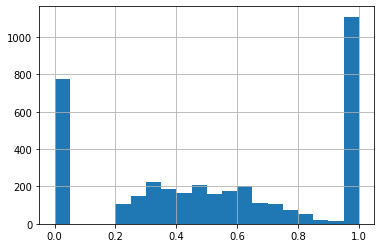

In [14]:
matchingOutputMedmentionsDf['Context Similarity Score'].hist(bins=20)

<AxesSubplot:>

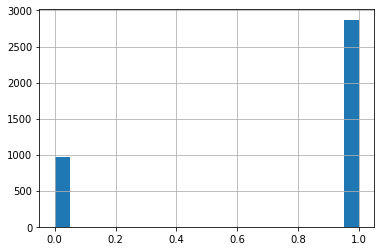

In [15]:
matchingOutputSnomedDf['Context Similarity Score'].hist(bins=20)

<AxesSubplot:>

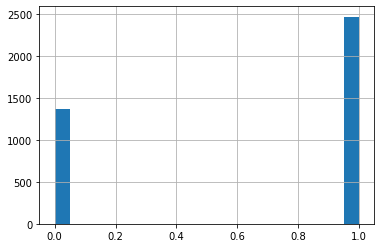

In [16]:
matchingOutputRxnormDf['Context Similarity Score'].hist(bins=20)

**Conclusion**

Snomed CDB in Medcat gave high confident matches when compared to Medmentions CDB

### Sample matches

#### STAPHYLOCOCCUS

In [14]:
matchingOutputMedmentionsDf[matchingOutputMedmentionsDf['concept_name'].str.contains('STAPHYLOCOCCUS')]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
1725,2000026023,STAPHYLOCOCCUS EPIDERMIDIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS EPIDERMIDIS,0.461488
1834,2000026132,STAPHYLOCOCCUS SPECIES,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C1705920,[T185],Species,SPECIES,0.772210
1849,2000026147,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038172,[T007],Staphylococcus aureus,STAPHYLOCOCCUS,0.566780
1854,2000026152,STAPHYLOCOCCUS LUGDUNENSIS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.494116
1939,2000026236,"STAPHYLOCOCCUS SAPROPHYTICUS, PRESUMPTIVE IDEN...",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Micrococcus ...,C0318112,[T007],Micrococcus subgroup 3,STAPHYLOCOCCUS SAPROPHYTICUS,1.000000
1946,2000026243,"STAPHYLOCOCCUS, COAGULASE NEGATIVE, PRESUMPTIV...",mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038172,[T007],Staphylococcus aureus,STAPHYLOCOCCUS,0.559532
2031,2000026328,STAPHYLOCOCCUS HAEMOLYTICUS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.491775
2046,2000026343,STAPHYLOCOCCUS CAPITIS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.494651
2047,2000026344,STAPHYLOCOCCUS HOMINIS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.499067
2048,2000026345,STAPHYLOCOCCUS WARNERI,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.491775


In [15]:
matchingOutputSnomedDf[matchingOutputSnomedDf['concept_name'].str.contains('STAPHYLOCOCCUS')]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
1725,2000026023,STAPHYLOCOCCUS EPIDERMIDIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,60875001,[81102976],Staphylococcus epidermidis,STAPHYLOCOCCUS EPIDERMIDIS,1.0
1834,2000026132,STAPHYLOCOCCUS SPECIES,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Genus Staphy...,65119002,[81102976],Genus Staphylococcus,STAPHYLOCOCCUS SPECIES,1.0
1849,2000026147,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,116197008,[81102976],"Staphylococcus, coagulase negative","STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0
1854,2000026152,STAPHYLOCOCCUS LUGDUNENSIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,103494005,[81102976],Staphylococcus lugdunensis,STAPHYLOCOCCUS LUGDUNENSIS,1.0
1939,2000026236,"STAPHYLOCOCCUS SAPROPHYTICUS, PRESUMPTIVE IDEN...",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,19743000,[81102976],Staphylococcus saprophyticus,STAPHYLOCOCCUS SAPROPHYTICUS,1.0
1946,2000026243,"STAPHYLOCOCCUS, COAGULASE NEGATIVE, PRESUMPTIV...",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,116197008,[81102976],"Staphylococcus, coagulase negative","STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0
2031,2000026328,STAPHYLOCOCCUS HAEMOLYTICUS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,83452006,[81102976],Staphylococcus haemolyticus,STAPHYLOCOCCUS HAEMOLYTICUS,1.0
2046,2000026343,STAPHYLOCOCCUS CAPITIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,40347003,[81102976],Staphylococcus capitis,STAPHYLOCOCCUS CAPITIS,1.0
2047,2000026344,STAPHYLOCOCCUS HOMINIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,44827007,[81102976],Staphylococcus hominis,STAPHYLOCOCCUS HOMINIS,1.0
2048,2000026345,STAPHYLOCOCCUS WARNERI,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,63550006,[81102976],Staphylococcus warneri,STAPHYLOCOCCUS WARNERI,1.0


**Conclusion**

Snomed CDB in Medcat gave accurate matches when compared to Medmentions CDB

#### baclofen

In [16]:
matchingOutputMedmentionsDf[matchingOutputMedmentionsDf['concept_name'].str.contains('Baclofen 10 MG Oral Tablet')]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
640,2000010634,Baclofen 10 MG Oral Tablet,mimiciv_drug_ndc,{'entities': {0: {'pretty_name': 'Oral Route o...,C1527415,[T169],Oral Route of Drug administration,Oral,0.621238


In [17]:
matchingOutputSnomedDf[matchingOutputSnomedDf['concept_name'].str.contains('Baclofen 10 MG Oral Tablet')]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
640,2000010634,Baclofen 10 MG Oral Tablet,mimiciv_drug_ndc,{'entities': {1: {'pretty_name': 'Product cont...,330116003,[27603525],Product containing precisely baclofen 10 milli...,Baclofen 10 MG Oral Tablet,1.0


**Conclusion**

Snomed CDB in Medcat gave more domain specific matches when compared to Medmentions CDB